In [1]:
#import dependencies 
import pandas as pd
from bs4 import BeautifulSoup
import requests
import pymongo
from collections import Counter 
from splinter import Browser
executable_path = {"executable_path": "chromedriver.exe"}
browser = Browser("chrome", **executable_path, headless=False)
import time
import matplotlib.pyplot as plt

In [2]:
# visit the TDOJ death row page
death_url = 'https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html'
#call the browers and go to the url
browser.visit(death_url)

In [3]:
#grab the value in the browser
texas_html = browser.html
#convert to a beautiful soup object
texas_soup = BeautifulSoup(texas_html, 'html.parser')

In [4]:
#find the table object inside the soup object- set to variabel 
texas_table = texas_soup.find('table', class_='tdcj_table indent')

In [5]:

#gather url 
url5 = "https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html"

#read the url using pdread
tables = pd.read_html(url5)




In [6]:
#grab the first object in the tables variable 
df = tables[0]
#set to dataframe
df.columns = ['Execution', 'Link', 'Link', 'Last_Name', 'First_Name',
'TDCJ', 'Age', 'Date', 'Race', 'County']


In [7]:
#group the data frame by race and find the count

grouped_race = df.groupby(['Race']).count()

In [8]:
#print the table grouped by race
grouped_race.head()

,Execution,Link,Link,Last_Name,First_Name,TDCJ,Age,Date,County
Race,,,,,,,,,
Black,205,205,205,205,205,205,205,205,205
Hispanic,108,108,108,108,108,108,108,108,108
Other,2,2,2,2,2,2,2,2,2
White,253,253,253,253,253,253,253,253,253


In [9]:
#group the data by date and count
grouped_date = df.groupby(['Date']).count()

In [11]:
#average age of executed prisoner
df.Age.mean()

39.77992957746479

In [12]:
#find the youngest offender
df.Age.min()

24

In [13]:
#find the oldest prisoner
df.Age.max()

70

In [14]:
#find the number of unique names
df.First_Name.nunique()

268

In [15]:
#what is the most common first name of offenders
df['First_Name'].value_counts().idxmax()

'Robert'

In [16]:
#most common last name of offenders
df['Last_Name'].value_counts().idxmax()

'Johnson'

<class 'pandas.core.series.Series'>


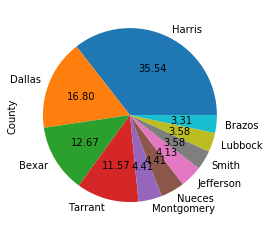

In [17]:
#lets find the most common county of execution an return the top ten values
#plot with matplotlib


countrys_by_executions = df['County'].value_counts()
countrys_by_executions
print(type(countrys_by_executions)) 


s = pd.Series(countrys_by_executions)
top_ten = s.nlargest(10)
top_ten.plot.pie(autopct='%.2f')


plt.show()




In [18]:
#most common county of execution 
df['County'].value_counts().idxmax()

'Harris'

In [19]:
#group by age and get the count of the number of prisioners at that age
grouped_age = df.groupby(['Age']).count()

In [22]:
#find the a tags in the object

a_tags = browser.find_by_tag('a').first.value


In [23]:
#print the a tags
a_tags

''

In [24]:
#we need to create lists of all the links inside the offender table in order to use beautiful soup later
#create a list to append items to
list_of_items = []

#we are going to iterate over the table object
for a in texas_table.find_all('a', href=True):
    #take the a[href] to a link
    link = a['href']
    #take the link and append it to the 
    list_of_items.append(link)
    
    #print ("Found the URL:", a['href'])

In [25]:
# print off the list of items 
print(list_of_items)
# the items here in this list are partial strings of htmls
# we will need to use string comprehensive to take the partial strings and add them to the remaining of the url

['dr_info/gardnerjohn.html', 'dr_info/gardnerjohnlast.html', 'dr_info/runnelstravis.html', 'dr_info/runnelstravislast.html', 'dr_info/halljusten.html', 'dr_info/halljustenlast.html', 'dr_info/sparksrobert.html', 'dr_info/sparksrobertlast.html', 'dr_info/solizmarkanthony.html', 'dr_info/solizmarkanthonylast.html', 'dr_info/crutsingerbilly.html', 'dr_info/crutsingerbillylast.html', 'dr_info/swearingenlarry.html', 'dr_info/swearingenlarrylast.html', 'dr_info/kingjohn.html', 'dr_info/kingjohnlast.html', 'dr_info/_coble.jpg', 'dr_info/coblebillielast.html', 'dr_info/jenningsrobert.jpg', 'dr_info/jenningsrobertlast.html', 'dr_info/brazielalvin.html', 'dr_info/brazielalvinlast.html', 'dr_info/garciajoseph.html', 'dr_info/garciajosephlast.html', 'dr_info/_ramos.jpg', 'dr_info/ramosrobertlast.html', 'dr_info/ackerdaniel.html', 'dr_info/ackerdaniellast.html', 'dr_info/clarktroy.html', 'dr_info/clarktroylast.html', 'dr_info/youngchristopher.html', 'dr_info/youngchristopherlast.html', 'dr_info/bib

In [26]:
#create new list
new_list = []
#take the partial string missing in the list in the prior cell
s = "https://www.tdcj.texas.gov/death_row/"
# for loop thorugh the existing list
for i in list_of_items:
    #take the partial string in the list
    new = s+str(i)
    #add the two strings together after convering i to a string
    new_list.append(new)
    #add to the new list and 
    print(new)

https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohn.html
https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohnlast.html
https://www.tdcj.texas.gov/death_row/dr_info/runnelstravis.html
https://www.tdcj.texas.gov/death_row/dr_info/runnelstravislast.html
https://www.tdcj.texas.gov/death_row/dr_info/halljusten.html
https://www.tdcj.texas.gov/death_row/dr_info/halljustenlast.html
https://www.tdcj.texas.gov/death_row/dr_info/sparksrobert.html
https://www.tdcj.texas.gov/death_row/dr_info/sparksrobertlast.html
https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthony.html
https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthonylast.html
https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbilly.html
https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbillylast.html
https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html
https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html
https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html
https://www.tdc

In [27]:
# print the new list--note that several of the items have death_row//death_row/ instead of death_row/death_row/
new_list

['https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravis.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravislast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljusten.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljustenlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobert.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthony.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthonylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbilly.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbillylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj

In [28]:
html_links=[]
jpeg_links=[]

#note that each offender has two or three  links, one with just their names and the #
#second with the word jpeg and then a third with their last words 
for link in new_list:
    #if the string URL contains hrml append to html links
    if "html" in link: 
        html_links.append(link)
    else:
        #otherwise send to jpeg links
        jpeg_links.append(link)
            
            
        
    

In [29]:

html_links

['https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravis.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravislast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljusten.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljustenlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobert.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthony.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthonylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbilly.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbillylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj

In [30]:
#take the results in html links, create an text file, iterate through the list and write each item to the text doc. 
with open('html_links.txt', 'w') as f:
    for item in html_links:
        f.write("%s\n" % item)

In [31]:
#take the results in jpeg links, create an text file, iterate through the list and write each item to the text doc. 

with open('jpeg_links.txt', 'w') as f:
    for item in jpeg_links:
        f.write("%s\n" % item)



In [32]:
#there are prisoners who did not give a statement, these are dead links, we are going to remove them 

dead_links = []
final_statements = []

#go through html links 
for link in html_links:
    #remove html stings with the word no_ in them
    if "no_" in link: 
        dead_links.append(link)
        #if no exists put it to the dead links list
    else:
        #otherwise append to final statements 
        final_statements.append(link)
            


In [33]:
#print the list
final_statements

['https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravis.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravislast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljusten.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljustenlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobert.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthony.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthonylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbilly.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbillylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj

In [34]:
typos = []
final_final_statements = []
#the typos from the previous list which includes death_row//death_row, we want to take those off as it will throw and error
#when we try to vist that website 
for link in final_statements:
    
    if "death_row//death_row" in link: 
        typos.append(link)
    else:
        final_final_statements.append(link)
            

In [36]:
#this is a list of last statements and prisoner information it is not a list of final statements we are almost there. 
final_final_statements

['https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravis.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravislast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljusten.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljustenlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobert.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthony.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthonylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbilly.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbillylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj

In [37]:

# we only want links which deather their "last" statement so we want to strip out the superfulious links 

others = []
last_statements = []
for link in final_final_statements:
    
    if "last.html" in link: 
        last_statements.append(link)
    else:
        others.append(link)

In [38]:
#list of offenders who made a last statement 
last_statements

['https://www.tdcj.texas.gov/death_row/dr_info/gardnerjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/runnelstravislast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/halljustenlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/sparksrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/solizmarkanthonylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/crutsingerbillylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html',
 'h

In [39]:
#how many last statements do we have

len(last_statements)

462

In [40]:
statements_final = []
counter = 0

#the counter is the number of inmates on the list
for link in last_statements:
    #loop though the list for the length of the list 
    if counter == len(last_statements):
        break
    #visit the browser
    browser.visit(link)
    html1 = browser.html
    soup1 = BeautifulSoup(html1, 'html.parser')
      #find all the p tags in the BS object
    page = soup1.find_all("p")
    
    #take each object and convert to string    
    statement = str(page)
    test1 = BeautifulSoup(statement)
    clean = test1.get_text()
    #we want the text of that string by removing the other p tags
    
   
   #append to our list and add one to the counter 
    statements_final.append(clean)
    counter += 1
    
    

In [52]:
print(type(statements_final)) 
#statements_final[0]

<class 'list'>


In [53]:
#print our list and what type it is
print(statements_final)
print(type(statements_final))
#convert it to string
allstatements = str(statements_final)
#print
print(allstatements)


['[Date of Execution:, January 15, 2020, Offender:, Gardner, John #999516, Last Statement:, Thank you thank you  where’s the family, ok I would like to say sorry for the grief I have caused. I  hope you find peace, joy and closure. Whatever it takes to forgive me. I am  sorry. I know you cannot forgive me but I hope one day you will. To my friends,  I love ya’ll. You have been good and such good influence people. I want to see  the Lord Jesus so bad. I hope you all understand. I am going to ask the Warden  to start. And ask Jesus to help them to forgive me one day please. I am very  sorry. For you guys I love you. Thank you Warden.]', '[Date of Execution:  , December 11, 2019,  Offender:,  Runnels, Travis Trevino #999505, Last Statement:, None, \xa0]', '[Date of Execution:  , November 6, 2019,  Offender:,  Hall, Justen #999497, Last Statement:, Yeah, I want to  address the Roundtree family and apologize for the pain and suffering I caused.  And to the Diaz’s family that I had to put yo

In [55]:
#convert to string and print
mystring = str(statements_final)
print(mystring)

#sent entire object to beautiful soup 
soup = BeautifulSoup(mystring)
#get the text from the BS object
print(soup.get_text())

['[Date of Execution:, January 15, 2020, Offender:, Gardner, John #999516, Last Statement:, Thank you thank you  where’s the family, ok I would like to say sorry for the grief I have caused. I  hope you find peace, joy and closure. Whatever it takes to forgive me. I am  sorry. I know you cannot forgive me but I hope one day you will. To my friends,  I love ya’ll. You have been good and such good influence people. I want to see  the Lord Jesus so bad. I hope you all understand. I am going to ask the Warden  to start. And ask Jesus to help them to forgive me one day please. I am very  sorry. For you guys I love you. Thank you Warden.]', '[Date of Execution:  , December 11, 2019,  Offender:,  Runnels, Travis Trevino #999505, Last Statement:, None, \xa0]', '[Date of Execution:  , November 6, 2019,  Offender:,  Hall, Justen #999497, Last Statement:, Yeah, I want to  address the Roundtree family and apologize for the pain and suffering I caused.  And to the Diaz’s family that I had to put yo

In [60]:
#import natural language tool kit and download whats needed
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Gabriel
[nltk_data]     Hernandez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Gabriel
[nltk_data]     Hernandez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
#allstatements is our string of all final statements
stopwords = ['I','to','and','the','you','of','my', 'for', 'that', ',','am', 'have', 'a', 'is', 'in', 'Last', 'Statement', 'Execution', 
 'your', 'it', 'with']

from nltk.corpus import stopwords
from nltk import word_tokenize
#set the stop words list to english
stop = set(stopwords.words('english'))
#change all the words on the stop list to lower and then split
print([i for i in allstatements.lower().split() if i not in stop])

cleaned_statements = [i for i in word_tokenize(allstatements.lower()) if i not in stop] 

type(cleaned_statements)

["['[date", 'execution:,', 'january', '15,', '2020,', 'offender:,', 'gardner,', 'john', '#999516,', 'last', 'statement:,', 'thank', 'thank', 'where’s', 'family,', 'ok', 'would', 'like', 'say', 'sorry', 'grief', 'caused.', 'hope', 'find', 'peace,', 'joy', 'closure.', 'whatever', 'takes', 'forgive', 'me.', 'sorry.', 'know', 'cannot', 'forgive', 'hope', 'one', 'day', 'will.', 'friends,', 'love', 'ya’ll.', 'good', 'good', 'influence', 'people.', 'want', 'see', 'lord', 'jesus', 'bad.', 'hope', 'understand.', 'going', 'ask', 'warden', 'start.', 'ask', 'jesus', 'help', 'forgive', 'one', 'day', 'please.', 'sorry.', 'guys', 'love', 'you.', 'thank', "warden.]',", "'[date", 'execution:', ',', 'december', '11,', '2019,', 'offender:,', 'runnels,', 'travis', 'trevino', '#999505,', 'last', 'statement:,', 'none,', "\\xa0]',", "'[date", 'execution:', ',', 'november', '6,', '2019,', 'offender:,', 'hall,', 'justen', '#999497,', 'last', 'statement:,', 'yeah,', 'want', 'address', 'roundtree', 'family', 'ap

list

In [65]:
# convert to string
cleaned_statements = str(cleaned_statements)
#replace all useless punctiation with spaces along with words that were not picked up by nltk stopwords
cleaned_statements = cleaned_statements.replace(',', '')
cleaned_statements = cleaned_statements.replace('"\'"', '')
cleaned_statements = cleaned_statements.replace("'.' ", '')
cleaned_statements = cleaned_statements.replace("'' ", '')
cleaned_statements = cleaned_statements.replace("'['", '')
cleaned_statements = cleaned_statements.replace("']'", '')
cleaned_statements = cleaned_statements.replace("'#'", '')
cleaned_statements = cleaned_statements.replace('statement', '')
cleaned_statements = cleaned_statements.replace('last', '')
cleaned_statements = cleaned_statements.replace('execution', '')
cleaned_statements = cleaned_statements.replace('date', '')
cleaned_statements = cleaned_statements.replace('offender', '')
cleaned_statements = cleaned_statements.replace("''", '')
cleaned_statements = cleaned_statements.replace("'’'", '')
cleaned_statements = cleaned_statements.replace("'``'", '')
cleaned_statements = cleaned_statements.replace('""', '')
cleaned_statements = cleaned_statements.replace('"n\'t"', '')
cleaned_statements = cleaned_statements.replace('"\'s"', '')
cleaned_statements = cleaned_statements.replace('"\'m"', '')
cleaned_statements = cleaned_statements.replace('"\'ll"', '')
cleaned_statements = cleaned_statements.replace("';'", '')
cleaned_statements = cleaned_statements.replace("':'", '')


In [66]:
from collections import Counter 
# split() returns list of all the words in the string 
split_it = cleaned_statements.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(50) 
  
print(most_occur) 

[("'love'", 801), ("'family'", 364), ("'know'", 351), ("'thank'", 313), ("'sorry'", 273), ("'would'", 253), ("'want'", 252), ("'like'", 243), ("'god'", 239), ("'say'", 198), ("'life'", 165), ("'hope'", 163), ("'forgive'", 158), ("'lord'", 158), ("'going'", 147), ("'tell'", 146), ("'people'", 133), ("'take'", 132), ("'see'", 126), ("'one'", 125), ("'peace'", 124), ("'ya'", 122), ("'yes'", 121), ("'jesus'", 118), ("'warden'", 111), ("'death'", 109), ("'give'", 103), ("'may'", 101), ("'ready'", 97), ("'pain'", 95), ("'go'", 95), ("'keep'", 95), ("'done'", 94), ("'ask'", 91), ("'strong'", 91), ("'let'", 89), ("'get'", 88), ("'heart'", 86), ("'father'", 84), ("'years'", 82), ("'man'", 82), ("'friends'", 81), ("'find'", 79), ("'right'", 79), ("'everybody'", 78), ("'please'", 72), ("'come'", 72), ("'time'", 72), ("'us'", 72), ('"y\'all"', 71)]


In [67]:
#going through the most occured word list and split them into a list of words, and the number of times they show up. THis will help
#us later when we make the pie chart
words = []
counts = []
for item in most_occur:
    words.append(item[0])
    counts.append(item[1])
 

In [68]:
#print our list of words
print(words)
#print our list of counts 
print(counts)

["'love'", "'family'", "'know'", "'thank'", "'sorry'", "'would'", "'want'", "'like'", "'god'", "'say'", "'life'", "'hope'", "'forgive'", "'lord'", "'going'", "'tell'", "'people'", "'take'", "'see'", "'one'", "'peace'", "'ya'", "'yes'", "'jesus'", "'warden'", "'death'", "'give'", "'may'", "'ready'", "'pain'", "'go'", "'keep'", "'done'", "'ask'", "'strong'", "'let'", "'get'", "'heart'", "'father'", "'years'", "'man'", "'friends'", "'find'", "'right'", "'everybody'", "'please'", "'come'", "'time'", "'us'", '"y\'all"']
[801, 364, 351, 313, 273, 253, 252, 243, 239, 198, 165, 163, 158, 158, 147, 146, 133, 132, 126, 125, 124, 122, 121, 118, 111, 109, 103, 101, 97, 95, 95, 95, 94, 91, 91, 89, 88, 86, 84, 82, 82, 81, 79, 79, 78, 72, 72, 72, 72, 71]


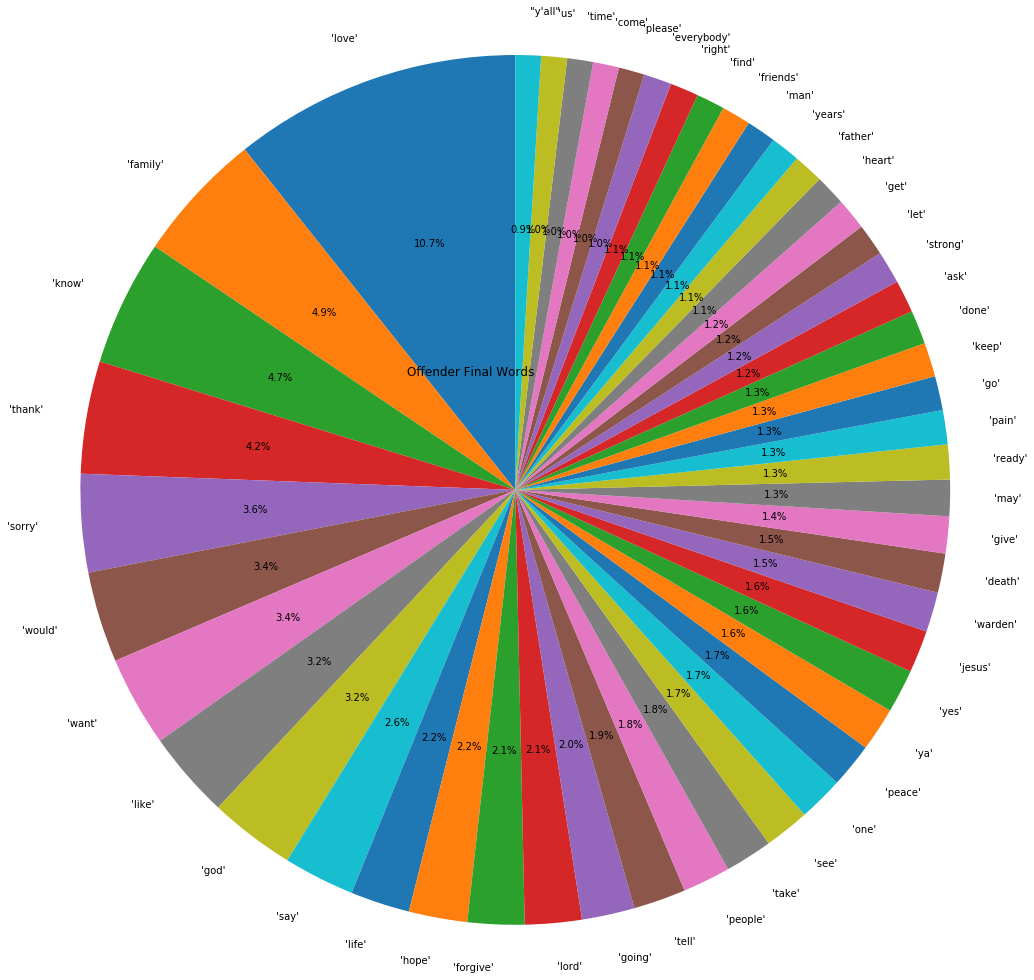

In [69]:
most_spoken = counts
final_words = words

plt.pie(most_spoken, labels=final_words, startangle=90, autopct='%.1f%%', radius=5)
plt.title('Offender Final Words', loc= "left")
plt.show()

In [72]:
d = {'Most Spoken Words': final_words,'Count of Words':most_spoken}

df = pd.DataFrame(d)
df

,Most Spoken Words,Count of Words
0,'love',801
1,'family',364
2,'know',351
3,'thank',313
4,'sorry',273
5,'would',253
6,'want',252
7,'like',243
8,'god',239
9,'say',198


In [73]:
df.to_json(orient='index')

'{"0":{"Most Spoken Words":"\'love\'","Count of Words":801},"1":{"Most Spoken Words":"\'family\'","Count of Words":364},"2":{"Most Spoken Words":"\'know\'","Count of Words":351},"3":{"Most Spoken Words":"\'thank\'","Count of Words":313},"4":{"Most Spoken Words":"\'sorry\'","Count of Words":273},"5":{"Most Spoken Words":"\'would\'","Count of Words":253},"6":{"Most Spoken Words":"\'want\'","Count of Words":252},"7":{"Most Spoken Words":"\'like\'","Count of Words":243},"8":{"Most Spoken Words":"\'god\'","Count of Words":239},"9":{"Most Spoken Words":"\'say\'","Count of Words":198},"10":{"Most Spoken Words":"\'life\'","Count of Words":165},"11":{"Most Spoken Words":"\'hope\'","Count of Words":163},"12":{"Most Spoken Words":"\'forgive\'","Count of Words":158},"13":{"Most Spoken Words":"\'lord\'","Count of Words":158},"14":{"Most Spoken Words":"\'going\'","Count of Words":147},"15":{"Most Spoken Words":"\'tell\'","Count of Words":146},"16":{"Most Spoken Words":"\'people\'","Count of Words":1